# PD model

## How to maintenance a PD model for coming new inputs

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Import data

In [3]:
inputs_train = pd.read_csv('inputs_train.csv', index_col=0)
targets_train = pd.read_csv('targets_train.csv', index_col=0)
inputs_test = pd.read_csv('inputs_test.csv', index_col=0)
targets_test = pd.read_csv('targets_test.csv', index_col=0)

In [4]:
data_backup = pd.read_csv('credit_risk_dataset.csv')

In [5]:
credit_data = data_backup.copy()

## Population Stability Index (PSI)

New data (actual) are required to come sooner than existing data (expected).

$$\text{PSI} = \sum_{j=1}^{k}\left[(\% \text{actual}_j - \% \text{expected}_j) \ \ln \left(\frac{\% \text{actual}_j}{\% \text{expected}_j}\right)\right]$$

### For now, we treat the original data as new data as a simple illustration. We will split 10% of the original data from different random seed.

In [6]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
credit_data.shape

(32581, 12)

In [8]:
credit_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
credit_data['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [11]:
credit_data['person_emp_length'].fillna(0, inplace=True)

In [12]:
credit_data['person_emp_length'].isnull().sum()

0

In [13]:
credit_data['loan_int_rate'].mean()

11.01169489224439

In [14]:
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].mean(), inplace=True)

In [15]:
credit_data['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

credit_data['cb_person_default_on_file_int'] = np.where(credit_data['cb_person_default_on_file'] == 'Y', 1, 0)

credit_data['cb_person_default_on_file_int'].head()

In [16]:
credit_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [17]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [18]:
credit_data['loan_status'].unique()

array([1, 0], dtype=int64)

### continuous variables: 
'person_age', 

'person_income', 

'person_emp_length', 

'loan_amnt', 

'loan_int_rate', 

'loan_percent_income', 

'cb_person_cred_hist_length'

### discrete variables: 
'person_home_ownership', 

'loan_grade', 

'loan_intent', 

'cb_person_default_on_file'

### target variable: 
'loan_status'

In [19]:
credit_data['person_age'].describe()

count    32581.000000
mean        27.734600
std          6.348078
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

(array([4.877e+03, 7.438e+03, 7.652e+03, 3.541e+03, 3.422e+03, 1.565e+03,
        1.646e+03, 6.750e+02, 7.000e+02, 3.050e+02, 2.960e+02, 1.240e+02,
        1.270e+02, 5.400e+01, 5.000e+01, 2.400e+01, 3.100e+01, 1.000e+01,
        1.900e+01, 5.000e+00, 7.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 20.  ,  22.48,  24.96,  27.44,  29.92,  32.4 ,  34.88,  37.36,
         39.84,  42.32,  44.8 ,  47.28,  49.76,  52.24,  54.72,  57.2 ,
         59.68,  62.16,  64.64,  67.12,  69.6 ,  72.08,  74.56,  77.04,
         79.52,  82.  ,  84.48,  86.96,  89.44,  91.92,  94.4 ,  96.88,
         99.36, 101.84, 104.32, 106.8 , 109.28, 111.76, 114.24, 116.72,
        119.2 , 

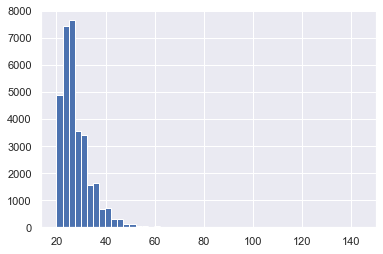

In [20]:
plt.hist(x='person_age', data=credit_data, bins=50)

In [21]:
(credit_data['person_age'] > 120).sum()

5

In [22]:
credit_data = credit_data[credit_data['person_age']<120]

In [23]:
credit_data['person_income'].describe()

count    3.257600e+04
mean     6.588214e+04
std      5.253499e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      2.039784e+06
Name: person_income, dtype: float64

In [24]:
credit_data['person_emp_length'].describe()

count    32576.000000
mean         4.657938
std          4.159740
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [25]:
credit_data['loan_amnt'].describe()

count    32576.000000
mean      9589.117755
std       6321.886846
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [26]:
credit_data['loan_int_rate'].describe()

count    32576.000000
mean        11.011561
std          3.081787
min          5.420000
25%          8.490000
50%         11.011695
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64

In [27]:
credit_data['loan_percent_income'].describe()

count    32576.000000
mean         0.170212
std          0.106778
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [28]:
credit_data['cb_person_cred_hist_length'].describe()

count    32576.000000
mean         5.803966
std          4.053791
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

### create dummy varialbes for discrete variables:

In [29]:
credit_data['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [30]:
credit_data['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [31]:
credit_data['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [32]:
dummies = [
    pd.get_dummies(credit_data['person_home_ownership'], prefix='person_home_ownership', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_grade'], prefix='loan_grade', prefix_sep=':'), 
    pd.get_dummies(credit_data['cb_person_default_on_file'], prefix='cb_person_default_on_file', prefix_sep=':'),
    pd.get_dummies(credit_data['loan_intent'], prefix='loan_intent', prefix_sep=':')
]

In [33]:
dummies = pd.concat(dummies, axis=1)

In [34]:
type(dummies)

pandas.core.frame.DataFrame

credit_data['cb_person_default_on_file:Y'] = credit_data['cb_person_default_on_file_int']

credit_data['cb_person_default_on_file:N'] = 1 - credit_data['cb_person_default_on_file:Y'] 

In [35]:
credit_data = pd.concat([credit_data, dummies], axis=1)

In [36]:
type(credit_data)

pandas.core.frame.DataFrame

In [37]:
credit_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade:F,loan_grade:G,cb_person_default_on_file:N,cb_person_default_on_file:Y,loan_intent:DEBTCONSOLIDATION,loan_intent:EDUCATION,loan_intent:HOMEIMPROVEMENT,loan_intent:MEDICAL,loan_intent:PERSONAL,loan_intent:VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,1,0,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,1,0,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,1,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,1,0,0,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,1,0,0
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,...,0,0,1,0,0,0,0,0,0,1
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,...,0,0,1,0,0,1,0,0,0,0
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,...,0,0,1,0,0,0,0,1,0,0
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,...,0,0,1,0,0,0,0,0,1,0
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,...,0,0,1,0,0,0,0,0,0,1


In [38]:
credit_data['loan_status'].sum() / credit_data.shape[0]

0.2181974459724951

In [39]:
credit_data['good_bad'] = 1 - credit_data['loan_status']

In [40]:
credit_data['good_bad'].sum() / credit_data.shape[0]

0.7818025540275049

### Splitting data to take illustrative samples

In [41]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('good_bad', axis=1), credit_data['good_bad'], test_size=0.1, random_state=101)

In [189]:
X_train.shape

(29318, 31)

In [190]:
y_train.shape

(29318,)

In [191]:
X_test.shape

(3258, 68)

In [192]:
y_test.shape

(3258,)

### Take illustrative samples

In [193]:
X_prep = X_train
y_prep = y_train
#X_prep = X_test
#y_prep = y_test

## Automatic WoE and IV calculator

In [47]:
def woe_discrete(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [48]:
def woe_continuous(df, var_name, df_target):
    df = pd.concat([df[var_name], df_target],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good']-df['prop_n_bad'])*df['WoE']
    df['IV'] = df['IV'].sum()
    return df

## WoE Plotter

In [49]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

## classing discrete variables

In [194]:
X_prep['person_home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OTHER', 'OWN'], dtype=object)

In [195]:
df = woe_discrete(X_prep, 'person_home_ownership', y_prep)

In [196]:
df

,person_home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,14805,0.686255,0.504980,10160.0,4645.0,0.443126,0.726917,-0.494958,NaN,NaN,0.364112
1,OTHER,92,0.695652,0.003138,64.0,28.0,0.002791,0.004382,-0.450946,0.009398,0.044012,0.364112
2,MORTGAGE,12112,0.872606,0.413125,10569.0,1543.0,0.460965,0.241471,0.646572,0.176954,1.097518,0.364112
3,OWN,2309,0.924643,0.078757,2135.0,174.0,0.093118,0.027230,1.229542,0.052037,0.582970,0.364112


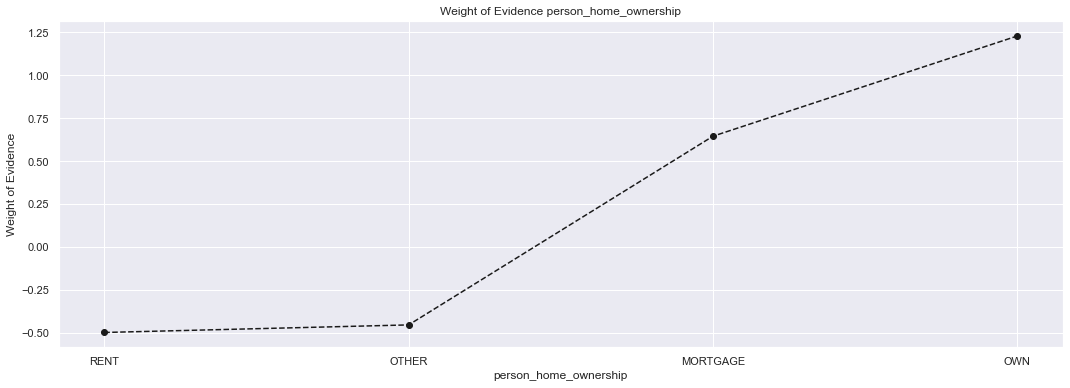

In [197]:
plot_by_woe(df)

In [198]:
# 'person_home_ownership:OWN', 'person_home_ownership:MORGAGE', 'person_home_ownership:OTHER_RENT'

X_prep['person_home_ownership:OTHER_RENT'] = sum([X_prep['person_home_ownership:OTHER'], X_prep['person_home_ownership:RENT']])

In [199]:
df= woe_discrete(X_prep,'cb_person_default_on_file',y_prep)

In [200]:
df

,cb_person_default_on_file,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Y,5174,0.623502,0.176479,3226.0,1948.0,0.140701,0.304851,-0.773185,NaN,NaN,0.161717
1,N,24144,0.816021,0.823521,19702.0,4442.0,0.859299,0.695149,0.211991,0.192518,0.985176,0.161717


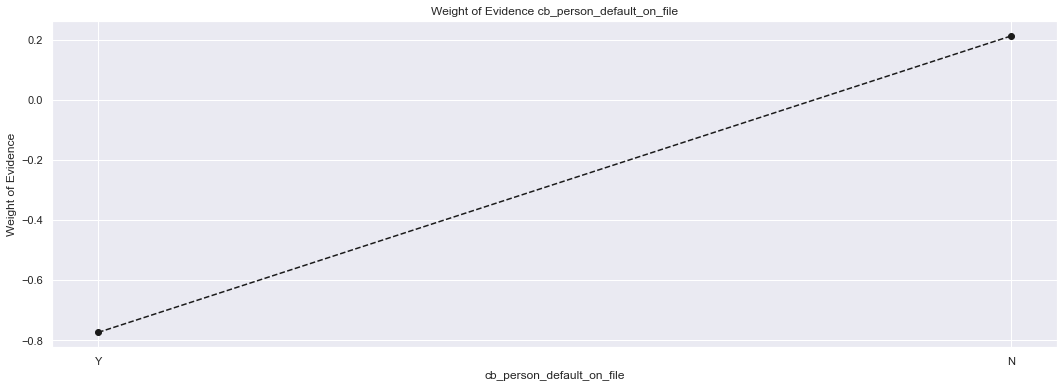

In [201]:
plot_by_woe(df)

In [202]:
# 'cb_person_default_on_file:Y', 'cb_person_default_on_file:N'

In [203]:
X_prep['loan_grade'].unique()

array(['C', 'A', 'D', 'E', 'B', 'G', 'F'], dtype=object)

In [204]:
df = woe_discrete(X_prep, 'loan_grade', y_prep)

In [205]:
df

,loan_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,59,0.016949,0.002012,1.0,58.0,0.000044,0.009077,-5.338068,NaN,NaN,0.871833
1,F,208,0.288462,0.007095,60.0,148.0,0.002617,0.023161,-2.180492,0.271512,3.157575,0.871833
2,E,863,0.352260,0.029436,304.0,559.0,0.013259,0.087480,-1.886746,0.063798,0.293746,0.871833
3,D,3239,0.411238,0.110478,1332.0,1907.0,0.058095,0.298435,-1.636474,0.058978,0.250272,0.871833
4,C,5800,0.792241,0.197831,4595.0,1205.0,0.200410,0.188576,0.060865,0.381003,1.697339,0.871833
5,B,9418,0.837545,0.321236,7888.0,1530.0,0.344033,0.239437,0.362450,0.045304,0.301586,0.871833
6,A,9731,0.898983,0.331912,8748.0,983.0,0.381542,0.153834,0.908347,0.061438,0.545896,0.871833


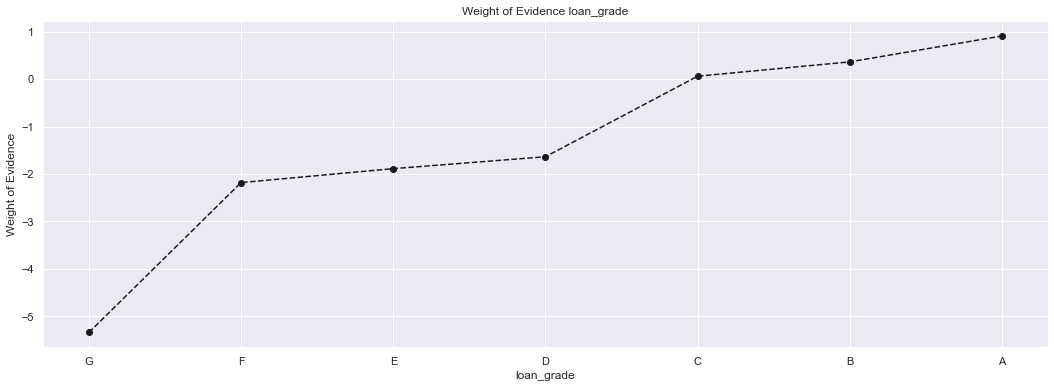

In [206]:
plot_by_woe(df)

In [207]:
# 'loan_grade:A',  'loan_grade:B', 'loan_grade:C', 'loan_grade:D', 'loan_grade:E', 'loan_grade:F', 'loan_grade:G',

In [208]:
X_prep['loan_intent'].unique()

array(['VENTURE', 'DEBTCONSOLIDATION', 'EDUCATION', 'MEDICAL',
       'HOMEIMPROVEMENT', 'PERSONAL'], dtype=object)

In [209]:
df = woe_discrete(X_prep, 'loan_intent', y_prep)

In [210]:
df

,loan_intent,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,DEBTCONSOLIDATION,4667,0.715877,0.159185,3341.0,1326.0,0.145717,0.207512,-0.353521,NaN,NaN,0.097367
1,MEDICAL,5498,0.733176,0.187530,4031.0,1467.0,0.175811,0.229577,-0.266830,0.017298,0.086692,0.097367
2,HOMEIMPROVEMENT,3269,0.736923,0.111501,2409.0,860.0,0.105068,0.134585,-0.247590,0.003747,0.019240,0.097367
3,PERSONAL,4985,0.800401,0.170032,3990.0,995.0,0.174023,0.155712,0.111179,0.063479,0.358769,0.097367
4,EDUCATION,5797,0.827497,0.197728,4797.0,1000.0,0.209220,0.156495,0.290366,0.027096,0.179187,0.097367
5,VENTURE,5102,0.854567,0.174023,4360.0,742.0,0.190161,0.116119,0.493253,0.027070,0.202887,0.097367


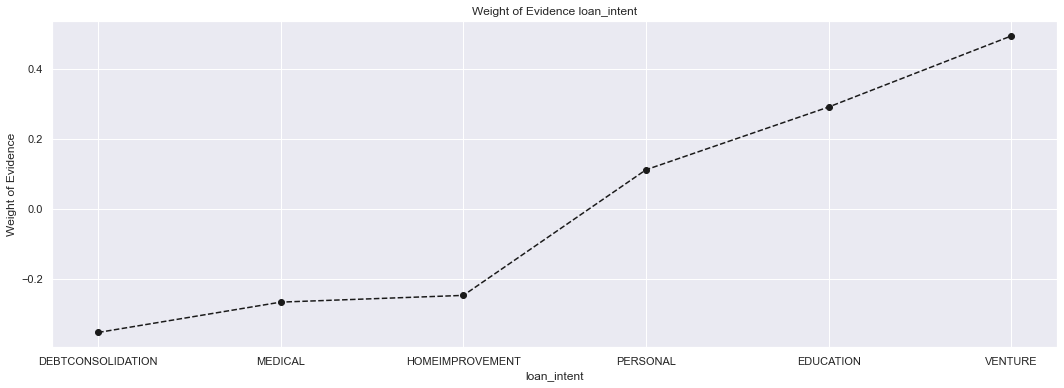

In [211]:
plot_by_woe(df)

In [212]:
# 'loan_intent:DEBTCONSOLIDATION', 'loan_intent:EDUCATION', 'loan_intent:HOMEIMPROVEMENT', 'loan_intent:MEDICAL', 'loan_intent:PERSONAL', 'loan_intent:VENTURE'

## Classing continuous variables

'person_age'

In [213]:
X_prep['person_age'].unique()

array([24, 26, 27, 36, 28, 25, 41, 23, 46, 40, 45, 30, 33, 29, 38, 34, 43,
       22, 31, 42, 39, 37, 21, 44, 32, 48, 35, 52, 49, 56, 54, 58, 47, 55,
       64, 61, 51, 53, 62, 66, 50, 65, 57, 20, 63, 60, 73, 70, 69, 80, 94,
       59, 78, 67], dtype=int64)

In [214]:
df = woe_continuous(X_prep, 'person_age', y_prep)

In [215]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,14,0.857143,0.000478,12.0,2.0,0.000523,0.000313,0.514135,NaN,NaN,inf
1,21,1109,0.697024,0.037827,773.0,336.0,0.033714,0.052582,-0.444457,0.160119,0.958592,inf
2,22,3292,0.754860,0.112286,2485.0,807.0,0.108383,0.126291,-0.152920,0.057836,0.291536,inf
3,23,3514,0.787137,0.119858,2766.0,748.0,0.120639,0.117058,0.030130,0.032277,0.183050,inf
4,24,3174,0.783869,0.108261,2488.0,686.0,0.108514,0.107355,0.010732,0.003268,0.019398,inf
5,25,2719,0.778595,0.092742,2117.0,602.0,0.092333,0.094210,-0.020127,0.005274,0.030859,inf
6,26,2245,0.793318,0.076574,1781.0,464.0,0.077678,0.072613,0.067421,0.014723,0.087548,inf
7,27,1933,0.788929,0.065932,1525.0,408.0,0.066513,0.063850,0.040858,0.004389,0.026563,inf
8,28,1648,0.774272,0.056211,1276.0,372.0,0.055652,0.058216,-0.045033,0.014657,0.085891,inf
9,29,1520,0.798684,0.051845,1214.0,306.0,0.052948,0.047887,0.100466,0.024412,0.145499,inf


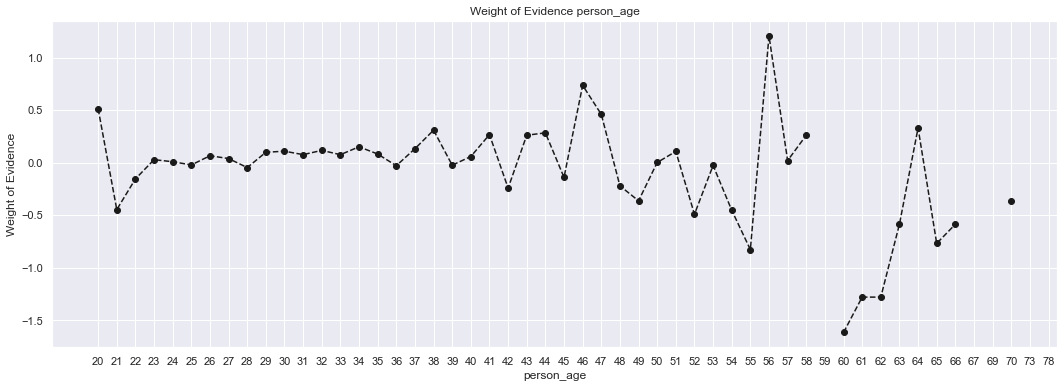

In [216]:
plot_by_woe(df)

In [217]:
# 'person_age:>37'

In [218]:
X_prep_temp = X_prep[X_prep['person_age']<=37]

In [219]:
df = woe_continuous(X_prep_temp, 'person_age', y_prep[X_prep_temp.index])

In [220]:
df

,person_age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,20,14,0.857143,0.000516,12.0,2.0,0.000566,0.000337,0.519481,NaN,NaN,0.015721
1,21,1109,0.697024,0.040883,773.0,336.0,0.036481,0.056594,-0.439110,0.160119,0.958592,0.015721
2,22,3292,0.754860,0.121360,2485.0,807.0,0.117278,0.135927,-0.147574,0.057836,0.291536,0.015721
3,23,3514,0.787137,0.129544,2766.0,748.0,0.130539,0.125990,0.035476,0.032277,0.183050,0.015721
4,24,3174,0.783869,0.117010,2488.0,686.0,0.117419,0.115547,0.016079,0.003268,0.019398,0.015721
5,25,2719,0.778595,0.100236,2117.0,602.0,0.099910,0.101398,-0.014780,0.005274,0.030859,0.015721
6,26,2245,0.793318,0.082762,1781.0,464.0,0.084053,0.078154,0.072768,0.014723,0.087548,0.015721
7,27,1933,0.788929,0.071260,1525.0,408.0,0.071971,0.068722,0.046204,0.004389,0.026563,0.015721
8,28,1648,0.774272,0.060754,1276.0,372.0,0.060220,0.062658,-0.039687,0.014657,0.085891,0.015721
9,29,1520,0.798684,0.056035,1214.0,306.0,0.057294,0.051541,0.105813,0.024412,0.145499,0.015721


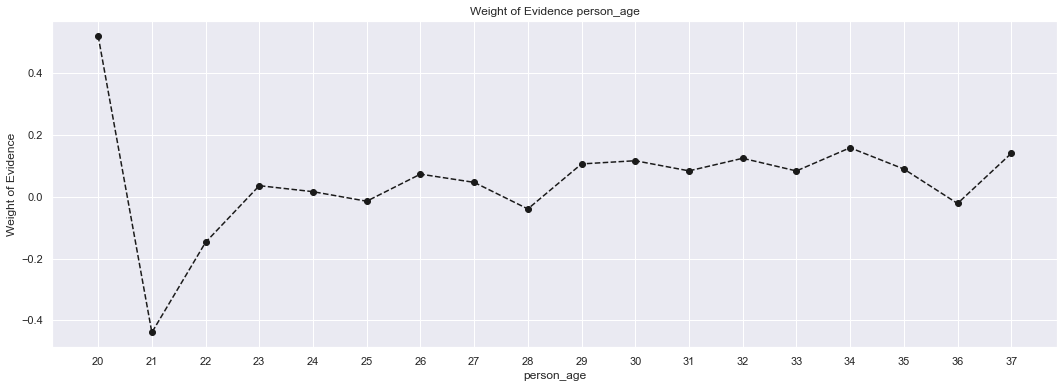

In [221]:
plot_by_woe(df)

In [222]:
# 'person_age:<=22', 'person_age:23-28', 'person_age:29-32', 'person_age:33-37',  'person_age:>=38'

X_prep['person_age:<=22'] = np.where((X_prep['person_age']<=22), 1, 0)

X_prep['person_age:23-28'] = np.where((X_prep['person_age']>=23) & (X_prep['person_age']<=28), 1, 0)

X_prep['person_age:29-33'] = np.where((X_prep['person_age']>=29) & (X_prep['person_age']<=32), 1, 0)

X_prep['person_age:34-37'] = np.where((X_prep['person_age']>=33) & (X_prep['person_age']<=37), 1, 0)

X_prep['person_age:>=38'] = np.where((X_prep['person_age']>=38), 1, 0)

'person_income'

In [223]:
X_prep['person_income'].nunique()

3994

In [224]:
X_prep['person_income_factor'] = pd.cut(X_prep['person_income'], 50)

In [225]:
df = woe_continuous(X_prep, 'person_income_factor', y_prep)

In [226]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1964.216, 44715.68]",9885,0.642185,0.337165,6348.0,3537.0,0.276867,0.553521,-0.692764,NaN,NaN,inf
1,"(44715.68, 85431.36]",13524,0.829784,0.461287,11222.0,2302.0,0.489445,0.360250,0.306473,0.187599,0.999237,inf
2,"(85431.36, 126147.04]",4036,0.908077,0.137663,3665.0,371.0,0.159848,0.058059,1.012757,0.078293,0.706284,inf
3,"(126147.04, 166862.72]",1079,0.903614,0.036803,975.0,104.0,0.042524,0.016275,0.960422,0.004463,0.052335,inf
4,"(166862.72, 207578.4]",427,0.925059,0.014564,395.0,32.0,0.017228,0.005008,1.235525,0.021444,0.275103,inf
5,"(207578.4, 248294.08]",131,0.832061,0.004468,109.0,22.0,0.004754,0.003443,0.322681,0.092997,0.912844,inf
6,"(248294.08, 289009.76]",80,0.862500,0.002729,69.0,11.0,0.003009,0.001721,0.558587,0.030439,0.235906,inf
7,"(289009.76, 329725.44]",47,0.978723,0.001603,46.0,1.0,0.002006,0.000156,2.551017,0.116223,1.992430,inf
8,"(329725.44, 370441.12]",22,1.000000,0.000750,22.0,0.0,0.000960,0.000000,inf,0.021277,inf,inf
9,"(370441.12, 411156.8]",18,0.833333,0.000614,15.0,3.0,0.000654,0.000469,0.331813,0.166667,inf,inf


In [227]:
# 'person_income:>120K'
X_prep_temp = X_prep[X_prep['person_income']<120000]

In [228]:
X_prep_temp['person_income_factor'] = pd.cut(X_prep_temp['person_income'], 50)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
df = woe_continuous(X_prep_temp, 'person_income_factor', y_prep[X_prep_temp.index])

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [230]:
df

,person_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3884.3, 6314.0]",11,0.000000,0.000410,0.0,11.0,0.000000,0.001778,-inf,NaN,NaN,inf
1,"(6314.0, 8628.0]",29,0.275862,0.001081,8.0,21.0,0.000388,0.003394,-2.170104,0.275862,inf,inf
2,"(8628.0, 10942.0]",70,0.100000,0.002609,7.0,63.0,0.000339,0.010183,-3.402247,0.175862,1.232144,inf
3,"(10942.0, 13256.0]",152,0.151316,0.005665,23.0,129.0,0.001114,0.020850,-2.929341,0.051316,0.472906,inf
4,"(13256.0, 15570.0]",193,0.202073,0.007193,39.0,154.0,0.001889,0.024891,-2.578414,0.050757,0.350927,inf
5,"(15570.0, 17884.0]",172,0.250000,0.006410,43.0,129.0,0.002083,0.020850,-2.303635,0.047927,0.274779,inf
6,"(17884.0, 20198.0]",456,0.364035,0.016995,166.0,290.0,0.008041,0.046872,-1.762916,0.114035,0.540719,inf
7,"(20198.0, 22512.0]",345,0.655072,0.012858,226.0,119.0,0.010947,0.019234,-0.563611,0.291037,1.199305,inf
8,"(22512.0, 24826.0]",540,0.707407,0.020125,382.0,158.0,0.018503,0.025537,-0.322197,0.052335,0.241414,inf
9,"(24826.0, 27140.0]",685,0.658394,0.025529,451.0,234.0,0.021845,0.037821,-0.548877,0.049013,0.226679,inf


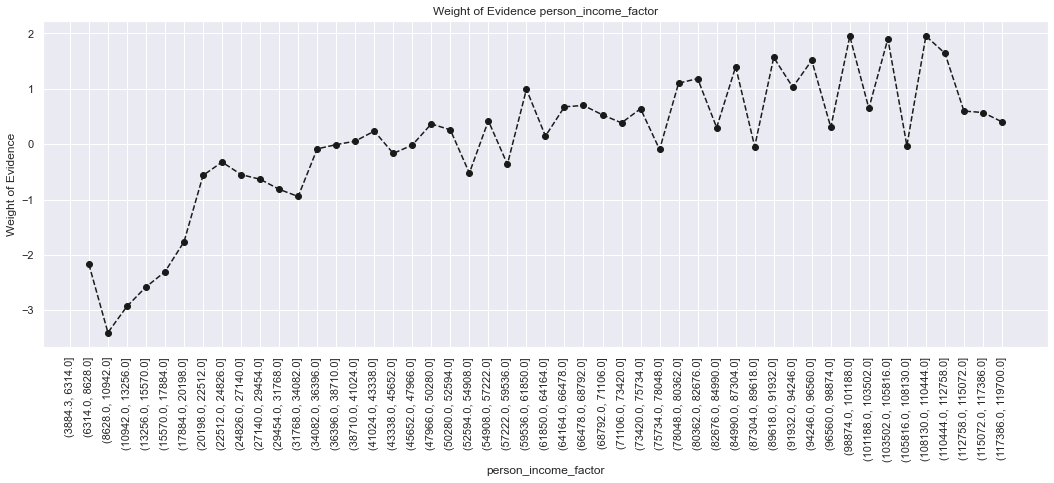

In [231]:
plot_by_woe(df, 90)

In [232]:
# 'person_income:<=20K', 'person_income:20K-34K',  'person_income:34K-52.5K', 'person_income:52.5K-66.5K', 'person_income:66.5K-75.7K',  'person_income:>75.7K',

X_prep['person_income:<=20K'] = np.where((X_prep['person_age']<=20000), 1, 0)

X_prep['person_income:20K-34K'] = np.where((X_prep['person_income']>20000) & (X_prep['person_age']<=34000), 1, 0)

X_prep['person_income:34K-52.5K'] = np.where((X_prep['person_income']>34000) & (X_prep['person_age']<=52500), 1, 0)

X_prep['person_income:52.5K-66.5K'] = np.where((X_prep['person_income']>52500) & (X_prep['person_age']<=66500), 1, 0)

X_prep['person_income:66.5K-75.7K'] = np.where((X_prep['person_income']>66500) & (X_prep['person_age']<=75700), 1, 0)

X_prep['person_income:>75.7K'] = np.where((X_prep['person_income']>75700), 1, 0)

'person_emp_length'

In [233]:
X_prep['person_emp_length'].unique()

array([  1.,   3.,   8.,   0.,   2.,   9.,   5.,  11.,   4.,   6.,  12.,
        14.,   7.,  10.,  16.,  15.,  13.,  18.,  17.,  21.,  20.,  19.,
        30.,  25.,  22., 123.,  31.,  24.,  28.,  27.,  23.,  29.,  26.,
        34.,  41.,  38.])

In [234]:
df = woe_continuous(X_prep, 'person_emp_length', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [235]:
df

,person_emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,4509,0.715236,0.153796,3225.0,1284.0,0.140658,0.200939,-0.356672,NaN,NaN,inf
1,1.0,2641,0.722454,0.090081,1908.0,733.0,0.083217,0.114710,-0.320959,0.007217,0.035712,inf
2,2.0,3434,0.744904,0.117129,2558.0,876.0,0.111567,0.137089,-0.206010,0.022450,0.114950,inf
3,3.0,3123,0.800512,0.106522,2500.0,623.0,0.109037,0.097496,0.111875,0.055608,0.317885,inf
4,4.0,2569,0.783963,0.087625,2014.0,555.0,0.087840,0.086854,0.011285,0.016550,0.100590,inf
5,5.0,2659,0.814216,0.090695,2165.0,494.0,0.094426,0.077308,0.200016,0.030253,0.188730,inf
6,6.0,2396,0.813439,0.081725,1949.0,447.0,0.085005,0.069953,0.194889,0.000777,0.005127,inf
7,7.0,1981,0.812216,0.067569,1609.0,372.0,0.070176,0.058216,0.186850,0.001223,0.008039,inf
8,8.0,1496,0.834225,0.051027,1248.0,248.0,0.054431,0.038811,0.338244,0.022009,0.151395,inf
9,9.0,1234,0.825770,0.042090,1019.0,215.0,0.044443,0.033646,0.278314,0.008455,0.059930,inf


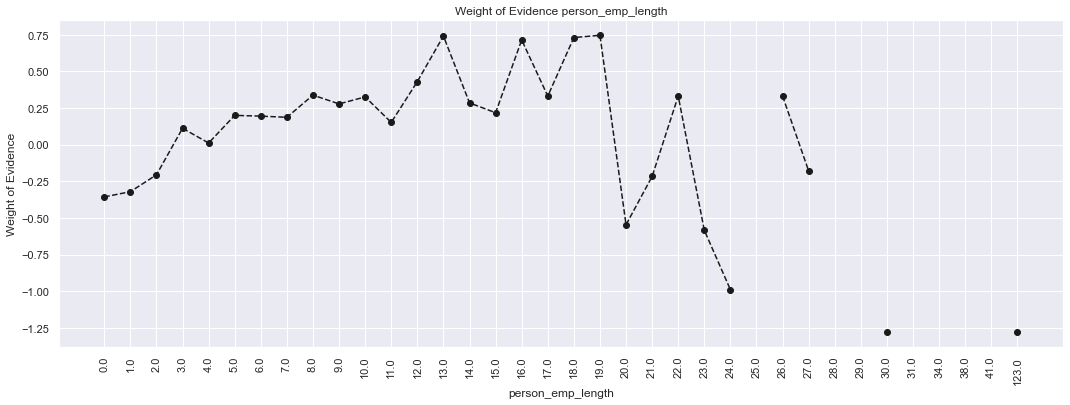

In [236]:
plot_by_woe(df,90)

In [237]:
# 'person_emp_length:<=2', 'person_emp_length:3-7', 'person_emp_length:8-10', 'person_emp_length:>10',



In [238]:
X_prep['person_emp_length:<=2'] = np.where((X_prep['person_emp_length']<=2), 1, 0)

X_prep['person_emp_length:3-7'] = np.where((X_prep['person_emp_length']>2) & (X_prep['person_emp_length']<=7), 1, 0)

X_prep['person_emp_length:8-10'] = np.where((X_prep['person_emp_length']>7) & (X_prep['person_emp_length']<=10), 1, 0)

X_prep['person_emp_length:>10'] = np.where((X_prep['person_emp_length']>10), 1, 0)

'loan_amnt'

In [239]:
X_prep['loan_amnt'].nunique()

739

In [240]:
X_prep['loan_amnt_factor'] = pd.cut(X_prep['loan_amnt'], 50)

In [241]:
df = woe_continuous(X_prep, 'loan_amnt_factor', y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [242]:
df

,loan_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",311,0.803859,0.010608,250.0,61.0,0.010904,0.009546,0.132962,NaN,NaN,inf
1,"(1190.0, 1880.0]",764,0.806283,0.026059,616.0,148.0,0.026867,0.023161,0.148410,0.002424,0.015448,inf
2,"(1880.0, 2570.0]",1352,0.785503,0.046115,1062.0,290.0,0.046319,0.045383,0.020404,0.020780,0.128006,inf
3,"(2570.0, 3260.0]",1408,0.772727,0.048025,1088.0,320.0,0.047453,0.050078,-0.053849,0.012776,0.074253,inf
4,"(3260.0, 3950.0]",782,0.805627,0.026673,630.0,152.0,0.027477,0.023787,0.144215,0.032899,0.198064,inf
5,"(3950.0, 4640.0]",1586,0.799496,0.054096,1268.0,318.0,0.055304,0.049765,0.105520,0.006131,0.038695,inf
6,"(4640.0, 5330.0]",2517,0.810886,0.085852,2041.0,476.0,0.089018,0.074491,0.178153,0.011390,0.072633,inf
7,"(5330.0, 6020.0]",2262,0.849691,0.077154,1922.0,340.0,0.083828,0.053208,0.454551,0.038805,0.276399,inf
8,"(6020.0, 6710.0]",744,0.831989,0.025377,619.0,125.0,0.026998,0.019562,0.322167,0.017701,0.132384,inf
9,"(6710.0, 7400.0]",1395,0.833692,0.047582,1163.0,232.0,0.050724,0.036307,0.334396,0.001703,0.012229,inf


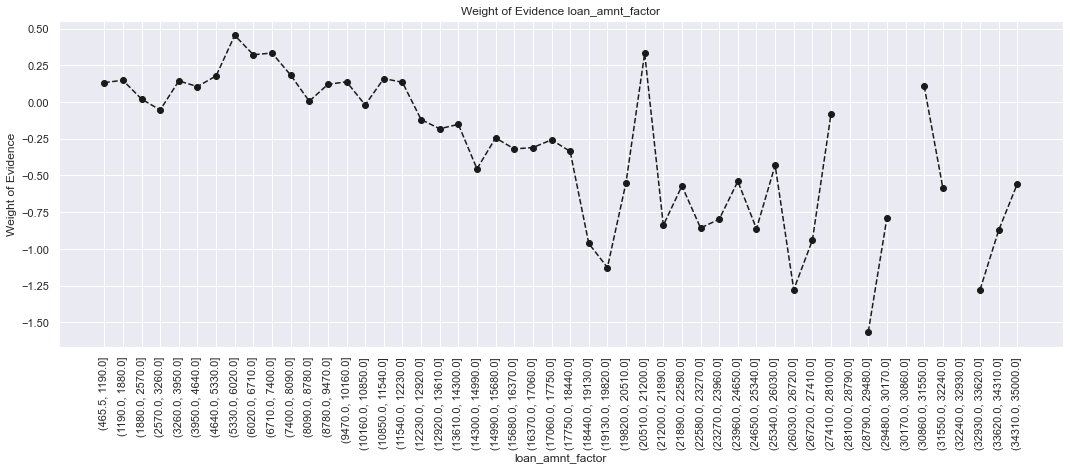

In [243]:
plot_by_woe(df,90)

In [244]:
# 'loan_amnt:<=3260', 'loan_amnt:3260-8090', 'loan_amnt:8090-12230', 'loan_amnt:12230-18440',  'loan_amnt:>18440',

X_prep['loan_amnt:<=3260'] = np.where((X_prep['loan_amnt']<=3260), 1, 0)

X_prep['loan_amnt:3260-8090'] = np.where((X_prep['loan_amnt']>3260) & (X_prep['loan_amnt']<=8090), 1, 0)

X_prep['loan_amnt:8090-12230'] = np.where((X_prep['loan_amnt']>8090) & (X_prep['loan_amnt']<=12230), 1, 0)

X_prep['loan_amnt:12230-18440'] = np.where((X_prep['loan_amnt']>12230) & (X_prep['loan_amnt']<=18440), 1, 0)

X_prep['loan_amnt:>18440'] = np.where((X_prep['loan_amnt']>18440), 1, 0)

'loan_int_rate',

In [245]:
X_prep['loan_int_rate'].nunique()

345

In [246]:
X_prep['loan_int_rate_factor'] = pd.cut(X_prep['loan_int_rate'], 50)

In [247]:
df = woe_continuous(X_prep, 'loan_int_rate_factor',y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [248]:
df

,loan_int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.402, 5.776]",544,0.946691,0.018555,515.0,29.0,0.022462,0.004538,1.599246,NaN,NaN,inf
1,"(5.776, 6.132]",1095,0.936073,0.037349,1025.0,70.0,0.044705,0.010955,1.406328,0.010618,0.192918,inf
2,"(6.132, 6.488]",243,0.917695,0.008288,223.0,20.0,0.009726,0.003130,1.133815,0.018378,0.272513,inf
3,"(6.488, 6.844]",763,0.895151,0.026025,683.0,80.0,0.029789,0.012520,0.866844,0.022545,0.266971,inf
4,"(6.844, 7.2]",1074,0.911546,0.036633,979.0,95.0,0.042699,0.014867,1.055030,0.016395,0.188187,inf
5,"(7.2, 7.556]",1730,0.890173,0.059008,1540.0,190.0,0.067167,0.029734,0.814889,0.021372,0.240141,inf
6,"(7.556, 7.912]",1577,0.883323,0.053789,1393.0,184.0,0.060755,0.028795,0.746655,0.006851,0.068234,inf
7,"(7.912, 8.268]",196,0.928571,0.006685,182.0,14.0,0.007938,0.002191,1.287325,0.045249,0.540670,inf
8,"(8.268, 8.624]",595,0.870588,0.020295,518.0,77.0,0.022592,0.012050,0.628545,0.057983,0.658780,inf
9,"(8.624, 8.98]",753,0.855246,0.025684,644.0,109.0,0.028088,0.017058,0.498726,0.015343,0.129819,inf


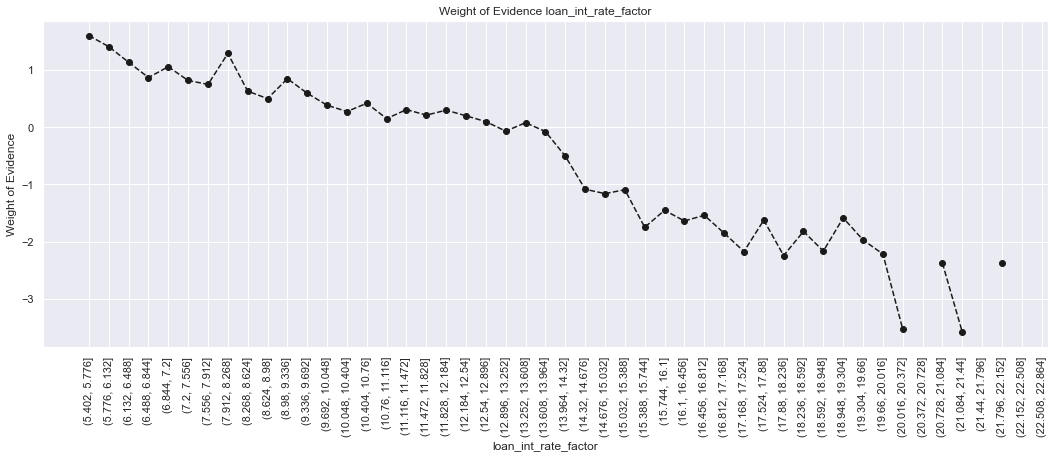

In [249]:
plot_by_woe(df,90)

In [250]:
# 'loan_int_rate:<=6.488', 'loan_int_rate:6.488-9.692', 'loan_int_rate:9.692-10.76', 'loan_int_rate:10.76-13.964', 'loan_int_rate:13.964-15.388', 'loan_int_rate:15.388-17.88', 'loan_int_rate:>17.88',

X_prep['loan_int_rate:<=6.488'] = np.where((X_prep['loan_int_rate']<=6.488), 1, 0)

X_prep['loan_int_rate:6.488-9.692'] = np.where((X_prep['loan_int_rate']>6.488) & (X_prep['loan_int_rate']<=9.692), 1, 0)

X_prep['loan_int_rate:9.692-10.76'] = np.where((X_prep['loan_int_rate']>9.692) & (X_prep['loan_int_rate']<=10.76), 1, 0)

X_prep['loan_int_rate:10.76-13.964'] = np.where((X_prep['loan_int_rate']>10.76) & (X_prep['loan_int_rate']<=13.964), 1, 0)

X_prep['loan_int_rate:13.964-15.388'] = np.where((X_prep['loan_int_rate']>13.964) & (X_prep['loan_int_rate']<=15.388), 1, 0)

X_prep['loan_int_rate:15.388-17.88'] = np.where((X_prep['loan_int_rate']>15.388) & (X_prep['loan_int_rate']<=17.88), 1, 0)

X_prep['loan_int_rate:>17.88'] = np.where((X_prep['loan_int_rate']>17.88), 1, 0)

'loan_percent_income', 

In [251]:
X_prep['loan_percent_income'].nunique()

76

In [252]:
X_prep['loan_percent_income_factor'] = pd.cut(X_prep['loan_percent_income'], 50)

In [253]:
df = woe_continuous(X_prep,'loan_percent_income_factor',y_prep)

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [254]:
df

,loan_percent_income_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.00083, 0.0166]",135,0.940741,0.004605,127.0,8.0,0.005539,0.001252,1.487121,NaN,NaN,inf
1,"(0.0166, 0.0332]",1050,0.907619,0.035814,953.0,97.0,0.041565,0.015180,1.007279,0.033122,0.479842,inf
2,"(0.0332, 0.0498]",868,0.879032,0.029606,763.0,105.0,0.033278,0.016432,0.705673,0.028587,0.301606,inf
3,"(0.0498, 0.0664]",2191,0.895482,0.074732,1962.0,229.0,0.085572,0.035837,0.870373,0.016449,0.164700,inf
4,"(0.0664, 0.083]",2569,0.871935,0.087625,2240.0,329.0,0.097697,0.051487,0.640549,0.023547,0.229824,inf
5,"(0.083, 0.0996]",1245,0.881928,0.042465,1098.0,147.0,0.047889,0.023005,0.733188,0.009993,0.092640,inf
6,"(0.0996, 0.116]",2621,0.874094,0.089399,2291.0,330.0,0.099921,0.051643,0.660026,0.007834,0.073162,inf
7,"(0.116, 0.133]",2489,0.878666,0.084897,2187.0,302.0,0.095386,0.047261,0.702234,0.004572,0.042208,inf
8,"(0.133, 0.149]",1164,0.840206,0.039703,978.0,186.0,0.042655,0.029108,0.382138,0.038460,0.320096,inf
9,"(0.149, 0.166]",2097,0.854554,0.071526,1792.0,305.0,0.078158,0.047731,0.493151,0.014348,0.111013,inf


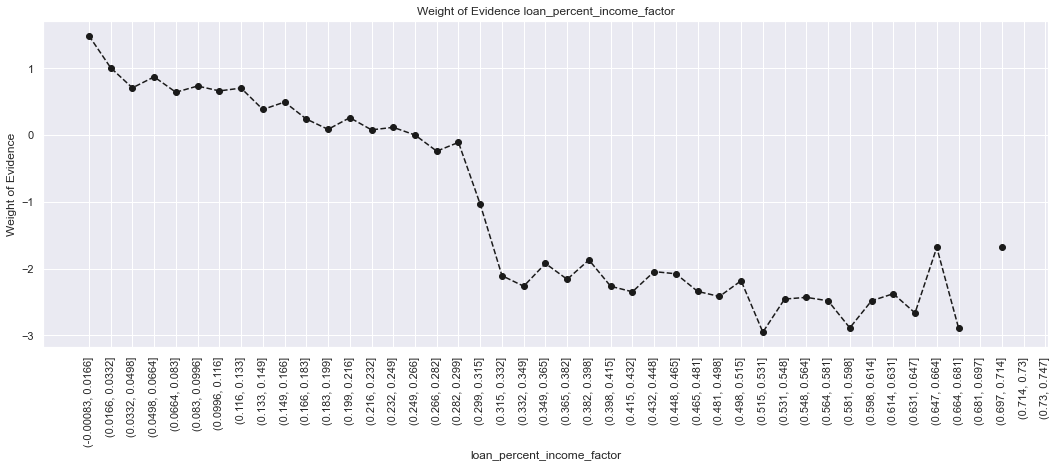

In [255]:
plot_by_woe(df,90)

In [256]:
# 'loan_percent_income:<=13.3pct', 'loan_percent_income:14.9-16.6pct', 'loan_percent_income:16.6-29.9pct', 'loan_percent_income:29.9-31.5pct', 'loan_percent_income:>31.5pct',

X_prep['loan_percent_income:<=13.3pct'] = np.where((X_prep['loan_percent_income']<=0.133), 1, 0)

X_prep['loan_percent_income:13.3-16.6pct'] = np.where((X_prep['loan_percent_income']>0.133) & (X_prep['loan_percent_income']<=0.166), 1, 0)

X_prep['loan_percent_income:16.6-29.9pct'] = np.where((X_prep['loan_percent_income']>0.166) & (X_prep['loan_percent_income']<=0.299), 1, 0)

X_prep['loan_percent_income:29.9-31.5pct'] = np.where((X_prep['loan_percent_income']>0.299) & (X_prep['loan_percent_income']<=0.315), 1, 0)

X_prep['loan_percent_income:>31.5pct'] = np.where((X_prep['loan_percent_income']>0.315), 1, 0)

'cb_person_cred_hist_length'

In [257]:
X_prep['cb_person_cred_hist_length'].unique()

array([ 3,  2, 10, 17,  9, 15,  4, 16,  5,  8, 13,  7,  6, 11, 14, 12, 18,
       24, 21, 25, 19, 20, 22, 28, 23, 30, 27, 26, 29], dtype=int64)

In [258]:
df = woe_continuous(X_prep,'cb_person_cred_hist_length',y_prep)

In [259]:
df

,cb_person_cred_hist_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,2,5357,0.764794,0.182721,4097.0,1260.0,0.178690,0.197183,-0.098481,NaN,NaN,0.008071
1,3,5341,0.779068,0.182175,4161.0,1180.0,0.181481,0.184664,-0.017384,0.014274,0.081098,0.008071
2,4,5369,0.775563,0.183130,4164.0,1205.0,0.181612,0.188576,-0.037628,0.003504,0.020244,0.008071
3,5,1674,0.796296,0.057098,1333.0,341.0,0.058139,0.053365,0.085680,0.020733,0.123308,0.008071
4,6,1669,0.787298,0.056927,1314.0,355.0,0.057310,0.055556,0.031089,0.008999,0.054591,0.008071
5,7,1688,0.799171,0.057576,1349.0,339.0,0.058836,0.053052,0.103494,0.011873,0.072405,0.008071
6,8,1720,0.784884,0.058667,1350.0,370.0,0.058880,0.057903,0.016732,0.014287,0.086762,0.008071
7,9,1704,0.792840,0.058121,1351.0,353.0,0.058924,0.055243,0.064508,0.007957,0.047775,0.008071
8,10,1662,0.797834,0.056689,1326.0,336.0,0.057833,0.052582,0.095186,0.004994,0.030679,0.008071
9,11,416,0.798077,0.014189,332.0,84.0,0.014480,0.013146,0.096694,0.000243,0.001507,0.008071


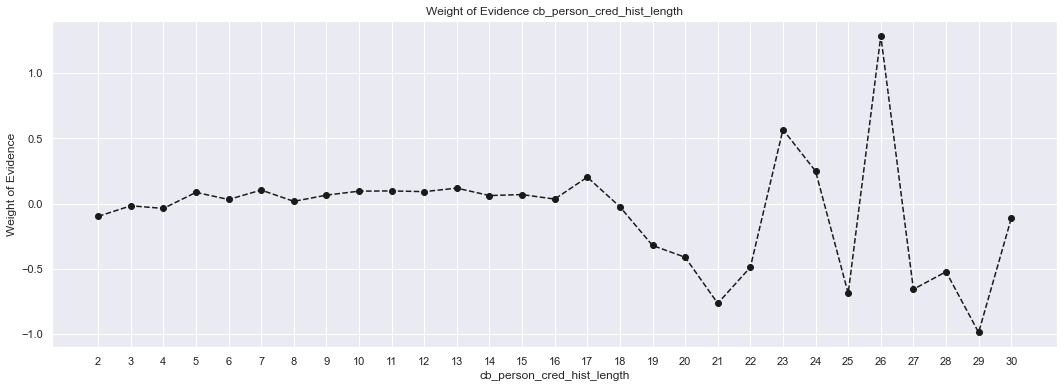

In [260]:
plot_by_woe(df)

In [261]:
# 'cb_person_cred_hist_length', discard

In [262]:
X_prep.shape

(29318, 68)

### If errors were encountered, then the new data may have some categories missing. Then adjust and delete or set 0 for missing categories accordingly.

In [119]:
X_new = X_prep

In [120]:
X_new.shape

(3258, 68)

In [121]:
y_new = y_test.copy()

In [122]:
y_new.shape

(3258,)

In [123]:
X_new.to_csv('inputs_new.csv')
y_new.to_csv('targets_new.csv')

### Finished new data preprocessing. Now move on to PSI calculation

In [124]:
inputs_train_ref = pd.read_csv('inputs_train_with_ref.csv', index_col=0)

In [127]:
inputs_new_ref = X_new.loc[:,[
    'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct'
]]

In [128]:
inputs_new_ref.shape

(3258, 48)

In [129]:
inputs_train_ref.shape

(26060, 48)

In [130]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col=0)

In [131]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name,Score-Calculation,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-8.852814,NaN,Intercept,300.609385,301,0.390615,300
1,1,person_home_ownership:OWN,3.006490,3.350000e-142,person_home_ownership,108.995084,109,0.004916,109
2,2,person_home_ownership:MORTGAGE,0.856950,1.200000e-73,person_home_ownership,31.067259,31,-0.067259,31
3,3,loan_grade:A,3.678657,7.250000e-48,loan_grade,133.363357,133,-0.363357,133
4,4,loan_grade:B,3.460546,5.230000e-50,loan_grade,125.456121,125,-0.456121,125
5,5,loan_grade:C,3.136632,2.090000e-42,loan_grade,113.713181,114,0.286819,114
6,6,loan_grade:D,1.036228,4.760000e-06,loan_grade,37.566651,38,0.433349,38
7,7,loan_grade:E,0.766886,3.197930e-04,loan_grade,27.802129,28,0.197871,28
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade,19.102534,19,-0.102534,19
9,9,loan_intent:EDUCATION,0.974232,1.490000e-47,loan_intent,35.319087,35,-0.319087,35


In [132]:
inputs_train_ref_intercept = inputs_train_ref
inputs_train_ref_intercept.insert(0,'Intercept',1)
inputs_train_ref_intercept = inputs_train_ref_intercept[df_scorecard['Feature Name'].values]

In [133]:
inputs_train_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,loan_percent_income:29.9-31.5pct,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct
24386,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
28394,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1342,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
7051,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8229,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [134]:
inputs_new_ref_intercept = inputs_new_ref
inputs_new_ref_intercept.insert(0,'Intercept',1)
inputs_new_ref_intercept = inputs_new_ref_intercept[df_scorecard['Feature Name'].values]

In [135]:
inputs_new_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,loan_percent_income:29.9-31.5pct,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct
10091,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
14993,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3316,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
18945,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6533,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


In [136]:
scorecard_scores = df_scorecard['Score-Final']
scorecard_scores = scorecard_scores.values.reshape(49,1)

In [137]:
y_scores_train = inputs_train_ref_intercept.dot(scorecard_scores)

In [139]:
y_scores_train.head()

,0
24386,681
28394,746
1342,677
7051,756
8229,623


In [138]:
y_scores_new = inputs_new_ref_intercept.dot(scorecard_scores)

In [142]:
y_scores_new.head()

,0
10091,766
14993,631
3316,726
18945,694
6533,729


In [143]:
inputs_train_ref_intercept = pd.concat([inputs_train_ref_intercept, y_scores_train], axis=1)

In [144]:
inputs_new_ref_intercept = pd.concat([inputs_new_ref_intercept, y_scores_new], axis=1)

In [145]:
inputs_train_ref_intercept.columns.values[inputs_train_ref_intercept.shape[1] -1] = 'Score'
inputs_new_ref_intercept.columns.values[inputs_new_ref_intercept.shape[1] -1] = 'Score'

In [149]:
inputs_train_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct,Score
24386,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,681
28394,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,746
1342,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,677
7051,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,756
8229,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,623


In [148]:
inputs_new_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct,Score
10091,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,766
14993,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,631
3316,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,726
18945,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,694
6533,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,729


In [172]:
inputs_train_ref_intercept['Score:300-350'] = np.where((inputs_train_ref_intercept['Score'] >= 300) & (inputs_train_ref_intercept['Score'] < 350), 1, 0)

inputs_train_ref_intercept['Score:350-400'] = np.where((inputs_train_ref_intercept['Score'] >= 350) & (inputs_train_ref_intercept['Score'] < 400), 1, 0)

inputs_train_ref_intercept['Score:400-450'] = np.where((inputs_train_ref_intercept['Score'] >= 400) & (inputs_train_ref_intercept['Score'] < 450), 1, 0)

inputs_train_ref_intercept['Score:450-500'] = np.where((inputs_train_ref_intercept['Score'] >= 450) & (inputs_train_ref_intercept['Score'] < 500), 1, 0)

inputs_train_ref_intercept['Score:500-550'] = np.where((inputs_train_ref_intercept['Score'] >= 500) & (inputs_train_ref_intercept['Score'] < 550), 1, 0)

inputs_train_ref_intercept['Score:550-600'] = np.where((inputs_train_ref_intercept['Score'] >= 550) & (inputs_train_ref_intercept['Score'] < 600), 1, 0)

inputs_train_ref_intercept['Score:600-650'] = np.where((inputs_train_ref_intercept['Score'] >= 600) & (inputs_train_ref_intercept['Score'] < 650), 1, 0)

inputs_train_ref_intercept['Score:650-700'] = np.where((inputs_train_ref_intercept['Score'] >= 650) & (inputs_train_ref_intercept['Score'] < 700), 1, 0)

inputs_train_ref_intercept['Score:700-750'] = np.where((inputs_train_ref_intercept['Score'] >= 700) & (inputs_train_ref_intercept['Score'] < 750), 1, 0)

inputs_train_ref_intercept['Score:750-800'] = np.where((inputs_train_ref_intercept['Score'] >= 750) & (inputs_train_ref_intercept['Score'] < 800), 1, 0)

inputs_train_ref_intercept['Score:800-850'] = np.where((inputs_train_ref_intercept['Score'] >= 800) & (inputs_train_ref_intercept['Score'] < 850), 1, 0)

In [173]:
inputs_new_ref_intercept['Score:300-350'] = np.where((inputs_new_ref_intercept['Score'] >= 300) & (inputs_new_ref_intercept['Score'] < 350), 1, 0)

inputs_new_ref_intercept['Score:350-400'] = np.where((inputs_new_ref_intercept['Score'] >= 350) & (inputs_new_ref_intercept['Score'] < 400), 1, 0)

inputs_new_ref_intercept['Score:400-450'] = np.where((inputs_new_ref_intercept['Score'] >= 400) & (inputs_new_ref_intercept['Score'] < 450), 1, 0)

inputs_new_ref_intercept['Score:450-500'] = np.where((inputs_new_ref_intercept['Score'] >= 450) & (inputs_new_ref_intercept['Score'] < 500), 1, 0)

inputs_new_ref_intercept['Score:500-550'] = np.where((inputs_new_ref_intercept['Score'] >= 500) & (inputs_new_ref_intercept['Score'] < 550), 1, 0)

inputs_new_ref_intercept['Score:550-600'] = np.where((inputs_new_ref_intercept['Score'] >= 550) & (inputs_new_ref_intercept['Score'] < 600), 1, 0)

inputs_new_ref_intercept['Score:600-650'] = np.where((inputs_new_ref_intercept['Score'] >= 600) & (inputs_new_ref_intercept['Score'] < 650), 1, 0)

inputs_new_ref_intercept['Score:650-700'] = np.where((inputs_new_ref_intercept['Score'] >= 650) & (inputs_new_ref_intercept['Score'] < 700), 1, 0)

inputs_new_ref_intercept['Score:700-750'] = np.where((inputs_new_ref_intercept['Score'] >= 700) & (inputs_new_ref_intercept['Score'] < 750), 1, 0)

inputs_new_ref_intercept['Score:750-800'] = np.where((inputs_new_ref_intercept['Score'] >= 750) & (inputs_new_ref_intercept['Score'] < 800), 1, 0)

inputs_new_ref_intercept['Score:800-850'] = np.where((inputs_new_ref_intercept['Score'] >= 800) & (inputs_new_ref_intercept['Score'] < 850), 1, 0)

### Calculate PSI

In [175]:
PSI_calc_train = inputs_train_ref_intercept.sum() / inputs_train_ref_intercept.shape[0]

In [176]:
PSI_calc_new = inputs_new_ref_intercept.sum() / inputs_new_ref_intercept.shape[0]

In [177]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_new], axis =1)

In [178]:
PSI_calc

,0,1
Intercept,1.000000,1.000000
person_home_ownership:OWN,0.079279,0.084408
person_home_ownership:MORTGAGE,0.413124,0.408226
loan_grade:A,0.328511,0.321056
loan_grade:B,0.321527,0.316145
...,...,...
Score:600-650,0.102916,0.109576
Score:650-700,0.200576,0.188766
Score:700-750,0.355334,0.351136
Score:750-800,0.164658,0.170657


In [179]:
PSI_calc = PSI_calc.reset_index()

In [180]:
PSI_calc['Original Feature Name'] = PSI_calc['index'].str.split(':').str[0]
PSI_calc.columns = ['index', 'Proportion_Train', 'Proportion_New', 'Original Feature Name']

In [181]:
PSI_calc = PSI_calc[np.array(['index', 'Original Feature Name', 'Proportion_Train', 'Proportion_New'])]

In [184]:
PSI_calc

,index,Original Feature Name,Proportion_Train,Proportion_New
0,Intercept,Intercept,1.000000,1.000000
1,person_home_ownership:OWN,person_home_ownership,0.079279,0.084408
2,person_home_ownership:MORTGAGE,person_home_ownership,0.413124,0.408226
3,loan_grade:A,loan_grade,0.328511,0.321056
4,loan_grade:B,loan_grade,0.321527,0.316145
5,loan_grade:C,loan_grade,0.200038,0.201351
6,loan_grade:D,loan_grade,0.111358,0.118785
7,loan_grade:E,loan_grade,0.029010,0.031001
8,loan_grade:F,loan_grade,0.007291,0.010129
9,loan_intent:EDUCATION,loan_intent,0.197659,0.200737


In [185]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]

In [186]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportion_Train'] == 0) | (PSI_calc['Proportion_New'] == 0), 0, (PSI_calc['Proportion_New'] - PSI_calc['Proportion_Train'])*np.log(PSI_calc['Proportion_New'] / PSI_calc['Proportion_Train']))

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [187]:
PSI_calc

,index,Original Feature Name,Proportion_Train,Proportion_New,Contribution
1,person_home_ownership:OWN,person_home_ownership,0.079279,0.084408,3.215360e-04
2,person_home_ownership:MORTGAGE,person_home_ownership,0.413124,0.408226,5.840952e-05
3,loan_grade:A,loan_grade,0.328511,0.321056,1.711399e-04
4,loan_grade:B,loan_grade,0.321527,0.316145,9.086363e-05
5,loan_grade:C,loan_grade,0.200038,0.201351,8.578915e-06
6,loan_grade:D,loan_grade,0.111358,0.118785,4.794108e-04
7,loan_grade:E,loan_grade,0.029010,0.031001,1.321130e-04
8,loan_grade:F,loan_grade,0.007291,0.010129,9.330689e-04
9,loan_intent:EDUCATION,loan_intent,0.197659,0.200737,4.754357e-05
10,loan_intent:HOMEIMPROVEMENT,loan_intent,0.110591,0.103131,5.210237e-04


In [188]:
PSI_calc.groupby('Original Feature Name')['Contribution'].sum()

Original Feature Name
Score                    0.001552
loan_amnt                0.000247
loan_grade               0.002099
loan_int_rate            0.001698
loan_intent              0.002813
loan_percent_income      0.000214
person_age               0.000413
person_emp_length        0.000978
person_home_ownership    0.000380
person_income            0.000137
Name: Contribution, dtype: float64

| Value of PSI: 0-1 |      Population difference |
|           ---      |                ---      |
|PSI = 0         |         No difference |
|PSI < 0.1        |        Little to no difference |
|0.1 < PSI < 0.25    |     Little difference (No action) |
|PSI > 0.25       |        Big difference (Action is taken) |
|PSI = 1         |         Absolute difference |

We can see that the PSI for all categories are less than 0.1. Hence, no action is taken.

Now, let's forge some data with the person_home_ownership category have bigger proportion with respect to the MORTGAGE status. Then repeat the process:

1. Take the X_train data set and rerun the classing code accordingly. 

2. Take all rows in X_train where X_train['person_home_ownership:OWN'] == 1.

3. Concatenate X_new with the rows in step 2.

In [263]:
X_prep.shape

(29318, 68)

In [271]:
y_prep.shape

(29318,)

In [266]:
X_temp = X_prep[X_prep['person_home_ownership:OWN']==1]

In [267]:
X_temp.shape

(2309, 68)

In [274]:
y_temp = y_prep[X_temp.index]

In [275]:
y_temp.shape

(2309,)

In [268]:
X_new.shape

(3258, 68)

In [269]:
X_new = pd.concat([X_new, X_temp])

In [270]:
X_new.shape

(5567, 68)

In [276]:
y_new.shape

(3258,)

In [277]:
y_new = pd.concat([y_new, y_temp])

In [278]:
y_new.shape

(5567,)

Now let's re-calculate the PSI for the new inputs.

In [279]:
inputs_train_ref = pd.read_csv('inputs_train_with_ref.csv', index_col=0)

In [280]:
inputs_new_ref = X_new.loc[:,[
    'person_home_ownership:OWN', 
    'person_home_ownership:MORTGAGE', 
    'person_home_ownership:OTHER_RENT',
    'loan_grade:A',  
    'loan_grade:B',
    'loan_grade:C', 
    'loan_grade:D', 
    'loan_grade:E', 
    'loan_grade:F', 
    'loan_grade:G',
    'loan_intent:DEBTCONSOLIDATION',
    'loan_intent:EDUCATION', 
    'loan_intent:HOMEIMPROVEMENT',
    'loan_intent:MEDICAL',
    'loan_intent:PERSONAL',
    'loan_intent:VENTURE',
    'person_age:<=22', 
    'person_age:23-28', 
    'person_age:29-33', 
    'person_age:34-37',  
    'person_age:>=38',
    'person_income:<=20K', 
    'person_income:20K-34K',  
    'person_income:34K-52.5K', 
    'person_income:52.5K-66.5K', 
    'person_income:66.5K-75.7K',  
    'person_income:>75.7K',
    'person_emp_length:<=2', 
    'person_emp_length:3-7', 
    'person_emp_length:8-10', 
    'person_emp_length:>10',
    'loan_amnt:<=3260', 
    'loan_amnt:3260-8090', 
    'loan_amnt:8090-12230', 
    'loan_amnt:12230-18440',  
    'loan_amnt:>18440',
    'loan_int_rate:<=6.488', 
    'loan_int_rate:6.488-9.692', 
    'loan_int_rate:9.692-10.76', 
    'loan_int_rate:10.76-13.964', 
    'loan_int_rate:13.964-15.388', 
    'loan_int_rate:15.388-17.88', 
    'loan_int_rate:>17.88',
    'loan_percent_income:<=13.3pct', 
    'loan_percent_income:13.3-16.6pct', 
    'loan_percent_income:16.6-29.9pct', 
    'loan_percent_income:29.9-31.5pct', 
    'loan_percent_income:>31.5pct'
]]

In [281]:
inputs_new_ref.shape

(5567, 48)

In [282]:
inputs_train_ref.shape

(26060, 48)

In [283]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col=0)

In [284]:
df_scorecard

,index,Feature Name,Coefficients,p_values,Original Feature Name,Score-Calculation,Score-Preliminary,Difference,Score-Final
0,0,Intercept,-8.852814,NaN,Intercept,300.609385,301,0.390615,300
1,1,person_home_ownership:OWN,3.006490,3.350000e-142,person_home_ownership,108.995084,109,0.004916,109
2,2,person_home_ownership:MORTGAGE,0.856950,1.200000e-73,person_home_ownership,31.067259,31,-0.067259,31
3,3,loan_grade:A,3.678657,7.250000e-48,loan_grade,133.363357,133,-0.363357,133
4,4,loan_grade:B,3.460546,5.230000e-50,loan_grade,125.456121,125,-0.456121,125
5,5,loan_grade:C,3.136632,2.090000e-42,loan_grade,113.713181,114,0.286819,114
6,6,loan_grade:D,1.036228,4.760000e-06,loan_grade,37.566651,38,0.433349,38
7,7,loan_grade:E,0.766886,3.197930e-04,loan_grade,27.802129,28,0.197871,28
8,8,loan_grade:F,0.526919,2.988458e-02,loan_grade,19.102534,19,-0.102534,19
9,9,loan_intent:EDUCATION,0.974232,1.490000e-47,loan_intent,35.319087,35,-0.319087,35


In [285]:
inputs_train_ref_intercept = inputs_train_ref
inputs_train_ref_intercept.insert(0,'Intercept',1)
inputs_train_ref_intercept = inputs_train_ref_intercept[df_scorecard['Feature Name'].values]

In [286]:
inputs_train_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,loan_percent_income:29.9-31.5pct,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct
24386,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
28394,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,1,0,0
1342,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
7051,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
8229,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [287]:
inputs_new_ref_intercept = inputs_new_ref
inputs_new_ref_intercept.insert(0,'Intercept',1)
inputs_new_ref_intercept = inputs_new_ref_intercept[df_scorecard['Feature Name'].values]

In [288]:
inputs_new_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,loan_percent_income:29.9-31.5pct,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct
10091,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
14993,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3316,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
18945,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6533,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0


In [289]:
scorecard_scores = df_scorecard['Score-Final']
scorecard_scores = scorecard_scores.values.reshape(49,1)

In [290]:
y_scores_train = inputs_train_ref_intercept.dot(scorecard_scores)

In [291]:
y_scores_train.head()

,0
24386,681
28394,746
1342,677
7051,756
8229,623


In [292]:
y_scores_new = inputs_new_ref_intercept.dot(scorecard_scores)

In [293]:
y_scores_new.head()

,0
10091,766
14993,631
3316,726
18945,694
6533,729


In [294]:
inputs_train_ref_intercept = pd.concat([inputs_train_ref_intercept, y_scores_train], axis=1)

In [295]:
inputs_new_ref_intercept = pd.concat([inputs_new_ref_intercept, y_scores_new], axis=1)

In [296]:
inputs_train_ref_intercept.columns.values[inputs_train_ref_intercept.shape[1] -1] = 'Score'
inputs_new_ref_intercept.columns.values[inputs_new_ref_intercept.shape[1] -1] = 'Score'

In [297]:
inputs_train_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct,Score
24386,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,681
28394,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,746
1342,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,677
7051,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,756
8229,1,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,623


In [298]:
inputs_new_ref_intercept.head()

,Intercept,person_home_ownership:OWN,person_home_ownership:MORTGAGE,loan_grade:A,loan_grade:B,loan_grade:C,loan_grade:D,loan_grade:E,loan_grade:F,loan_intent:EDUCATION,...,person_home_ownership:OTHER_RENT,loan_grade:G,loan_intent:DEBTCONSOLIDATION,person_age:<=22,person_income:<=20K,person_emp_length:<=2,loan_amnt:>18440,loan_int_rate:>17.88,loan_percent_income:>31.5pct,Score
10091,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,766
14993,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,631
3316,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,726
18945,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,694
6533,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,729


In [299]:
inputs_train_ref_intercept['Score:300-350'] = np.where((inputs_train_ref_intercept['Score'] >= 300) & (inputs_train_ref_intercept['Score'] < 350), 1, 0)

inputs_train_ref_intercept['Score:350-400'] = np.where((inputs_train_ref_intercept['Score'] >= 350) & (inputs_train_ref_intercept['Score'] < 400), 1, 0)

inputs_train_ref_intercept['Score:400-450'] = np.where((inputs_train_ref_intercept['Score'] >= 400) & (inputs_train_ref_intercept['Score'] < 450), 1, 0)

inputs_train_ref_intercept['Score:450-500'] = np.where((inputs_train_ref_intercept['Score'] >= 450) & (inputs_train_ref_intercept['Score'] < 500), 1, 0)

inputs_train_ref_intercept['Score:500-550'] = np.where((inputs_train_ref_intercept['Score'] >= 500) & (inputs_train_ref_intercept['Score'] < 550), 1, 0)

inputs_train_ref_intercept['Score:550-600'] = np.where((inputs_train_ref_intercept['Score'] >= 550) & (inputs_train_ref_intercept['Score'] < 600), 1, 0)

inputs_train_ref_intercept['Score:600-650'] = np.where((inputs_train_ref_intercept['Score'] >= 600) & (inputs_train_ref_intercept['Score'] < 650), 1, 0)

inputs_train_ref_intercept['Score:650-700'] = np.where((inputs_train_ref_intercept['Score'] >= 650) & (inputs_train_ref_intercept['Score'] < 700), 1, 0)

inputs_train_ref_intercept['Score:700-750'] = np.where((inputs_train_ref_intercept['Score'] >= 700) & (inputs_train_ref_intercept['Score'] < 750), 1, 0)

inputs_train_ref_intercept['Score:750-800'] = np.where((inputs_train_ref_intercept['Score'] >= 750) & (inputs_train_ref_intercept['Score'] < 800), 1, 0)

inputs_train_ref_intercept['Score:800-850'] = np.where((inputs_train_ref_intercept['Score'] >= 800) & (inputs_train_ref_intercept['Score'] < 850), 1, 0)

In [300]:
inputs_new_ref_intercept['Score:300-350'] = np.where((inputs_new_ref_intercept['Score'] >= 300) & (inputs_new_ref_intercept['Score'] < 350), 1, 0)

inputs_new_ref_intercept['Score:350-400'] = np.where((inputs_new_ref_intercept['Score'] >= 350) & (inputs_new_ref_intercept['Score'] < 400), 1, 0)

inputs_new_ref_intercept['Score:400-450'] = np.where((inputs_new_ref_intercept['Score'] >= 400) & (inputs_new_ref_intercept['Score'] < 450), 1, 0)

inputs_new_ref_intercept['Score:450-500'] = np.where((inputs_new_ref_intercept['Score'] >= 450) & (inputs_new_ref_intercept['Score'] < 500), 1, 0)

inputs_new_ref_intercept['Score:500-550'] = np.where((inputs_new_ref_intercept['Score'] >= 500) & (inputs_new_ref_intercept['Score'] < 550), 1, 0)

inputs_new_ref_intercept['Score:550-600'] = np.where((inputs_new_ref_intercept['Score'] >= 550) & (inputs_new_ref_intercept['Score'] < 600), 1, 0)

inputs_new_ref_intercept['Score:600-650'] = np.where((inputs_new_ref_intercept['Score'] >= 600) & (inputs_new_ref_intercept['Score'] < 650), 1, 0)

inputs_new_ref_intercept['Score:650-700'] = np.where((inputs_new_ref_intercept['Score'] >= 650) & (inputs_new_ref_intercept['Score'] < 700), 1, 0)

inputs_new_ref_intercept['Score:700-750'] = np.where((inputs_new_ref_intercept['Score'] >= 700) & (inputs_new_ref_intercept['Score'] < 750), 1, 0)

inputs_new_ref_intercept['Score:750-800'] = np.where((inputs_new_ref_intercept['Score'] >= 750) & (inputs_new_ref_intercept['Score'] < 800), 1, 0)

inputs_new_ref_intercept['Score:800-850'] = np.where((inputs_new_ref_intercept['Score'] >= 800) & (inputs_new_ref_intercept['Score'] < 850), 1, 0)

In [301]:
PSI_calc_train = inputs_train_ref_intercept.sum() / inputs_train_ref_intercept.shape[0]

In [302]:
PSI_calc_new = inputs_new_ref_intercept.sum() / inputs_new_ref_intercept.shape[0]

In [303]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_new], axis =1)

In [304]:
PSI_calc

,0,1
Intercept,1.000000,1.000000
person_home_ownership:OWN,0.079279,0.464164
person_home_ownership:MORTGAGE,0.413124,0.238908
loan_grade:A,0.328511,0.337525
loan_grade:B,0.321527,0.313634
loan_grade:C,0.200038,0.197952
loan_grade:D,0.111358,0.113167
loan_grade:E,0.029010,0.027304
loan_grade:F,0.007291,0.008622
loan_intent:EDUCATION,0.197659,0.203341


In [305]:
PSI_calc = PSI_calc.reset_index()

In [306]:
PSI_calc['Original Feature Name'] = PSI_calc['index'].str.split(':').str[0]
PSI_calc.columns = ['index', 'Proportion_Train', 'Proportion_New', 'Original Feature Name']

In [307]:
PSI_calc = PSI_calc[np.array(['index', 'Original Feature Name', 'Proportion_Train', 'Proportion_New'])]

In [308]:
PSI_calc

,index,Original Feature Name,Proportion_Train,Proportion_New
0,Intercept,Intercept,1.000000,1.000000
1,person_home_ownership:OWN,person_home_ownership,0.079279,0.464164
2,person_home_ownership:MORTGAGE,person_home_ownership,0.413124,0.238908
3,loan_grade:A,loan_grade,0.328511,0.337525
4,loan_grade:B,loan_grade,0.321527,0.313634
5,loan_grade:C,loan_grade,0.200038,0.197952
6,loan_grade:D,loan_grade,0.111358,0.113167
7,loan_grade:E,loan_grade,0.029010,0.027304
8,loan_grade:F,loan_grade,0.007291,0.008622
9,loan_intent:EDUCATION,loan_intent,0.197659,0.203341


In [309]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]

In [310]:
PSI_calc['Contribution'] = np.where((PSI_calc['Proportion_Train'] == 0) | (PSI_calc['Proportion_New'] == 0), 0, (PSI_calc['Proportion_New'] - PSI_calc['Proportion_Train'])*np.log(PSI_calc['Proportion_New'] / PSI_calc['Proportion_Train']))

C:\Users\YizhiZhang\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\YizhiZhang\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [311]:
PSI_calc

,index,Original Feature Name,Proportion_Train,Proportion_New,Contribution
1,person_home_ownership:OWN,person_home_ownership,0.079279,0.464164,0.680196
2,person_home_ownership:MORTGAGE,person_home_ownership,0.413124,0.238908,0.095413
3,loan_grade:A,loan_grade,0.328511,0.337525,0.000244
4,loan_grade:B,loan_grade,0.321527,0.313634,0.000196
5,loan_grade:C,loan_grade,0.200038,0.197952,0.000022
6,loan_grade:D,loan_grade,0.111358,0.113167,0.000029
7,loan_grade:E,loan_grade,0.029010,0.027304,0.000103
8,loan_grade:F,loan_grade,0.007291,0.008622,0.000223
9,loan_intent:EDUCATION,loan_intent,0.197659,0.203341,0.000161
10,loan_intent:HOMEIMPROVEMENT,loan_intent,0.110591,0.111371,0.000005


In [312]:
PSI_calc.groupby('Original Feature Name')['Contribution'].sum()

Original Feature Name
Score                    0.324106
loan_amnt                0.002590
loan_grade               0.000926
loan_int_rate            0.001036
loan_intent              0.040662
loan_percent_income      0.004732
person_age               0.000382
person_emp_length        0.002163
person_home_ownership    0.888569
person_income            0.017212
Name: Contribution, dtype: float64

The PSI for 'person_home_ownership' is significant enough to conclude that the new population is different from the training data. And the model needs calibration.

categories:
    
'person_home_ownership:OWN', 
'person_home_ownership:MORTGAGE', 
'person_home_ownership:OTHER_RENT',
'loan_grade:A',  
'loan_grade:B',
'loan_grade:C', 
'loan_grade:D', 
'loan_grade:E', 
'loan_grade:F', 
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'loan_intent:EDUCATION', 
'loan_intent:HOMEIMPROVEMENT',
'loan_intent:MEDICAL',
'loan_intent:PERSONAL',
'loan_intent:VENTURE',
'person_age:<=22', 
'person_age:23-28', 
'person_age:29-33', 
'person_age:34-37',  
'person_age:>=38',
'person_income:<=20K', 
'person_income:20K-34K',  
'person_income:34K-52.5K', 
'person_income:52.5K-66.5K', 
'person_income:66.5K-75.7K',  
'person_income:>75.7K',
'person_emp_length:<=2', 
'person_emp_length:3-7', 
'person_emp_length:8-10', 
'person_emp_length:>10',
'loan_amnt:<=3260', 
'loan_amnt:3260-8090', 
'loan_amnt:8090-12230', 
'loan_amnt:12230-18440',  
'loan_amnt:>18440',
'loan_int_rate:<=6.488', 
'loan_int_rate:6.488-9.692', 
'loan_int_rate:9.692-10.76', 
'loan_int_rate:10.76-13.964', 
'loan_int_rate:13.964-15.388', 
'loan_int_rate:15.388-17.88', 
'loan_int_rate:>17.88',
'loan_percent_income:<=13.3pct', 
'loan_percent_income:13.3-16.6pct', 
'loan_percent_income:16.6-29.9pct', 
'loan_percent_income:29.9-31.5pct', 
'loan_percent_income:>31.5pct',


reference categories:

'person_home_ownership:OTHER_RENT',
'loan_grade:G',
'loan_intent:DEBTCONSOLIDATION',
'person_age:<=22',
'person_income:<=20K',
'person_emp_length:<=2',
'loan_amnt:>18440',
'loan_int_rate:>17.88',
'loan_percent_income:>31.5pct',
